# Class 4: Descriptive statistics continued and array computations

In this notebook we will continue learning about descriptive statistics, and we will start learning how to do computations on arrays of data. 

## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [1]:
import YData

# YData.download.download_class_code(4)   # get class 4 code    

# YData.download.download_class_code(4, True) # get the code with the answers 

There are also similar functions to download the homework:

In [2]:
YData.download.download_homework(1)  # downloads the first homework if you have not done so already

The file `homework_01.ipynb` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [3]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Review: NBA Salaries

Let's continue to look a salaries and other information about basketball players in the NBA! The data we will analyze contains infomraiton about each player including their salary from the 2022-2023 season listed in millions of dollars.  

We will load the data as a "pandas DataFrame" which is a data structure we will discuss more in a couple of weeks. We will then convert the data to lists and dictionaries to explore it further. 

This table can be found online: https://www.gigasheet.com/sample-data/nba-player-salaries-2022-23-season


In [5]:
# download the data
import YData
YData.download.download_data("nba_salaries_2022_23.csv")

The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [6]:
# load the data and display the first 6 rows

import pandas as pd

nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data

nba.head()  # show the first 6 rows


,PLAYER,POSITION,TEAM,SALARY
0,De'Andre Hunter,SF,Atlanta Hawks,9.835881
1,Jalen Johnson,SF,Atlanta Hawks,2.792640
2,AJ Griffin,SF,Atlanta Hawks,3.536160
3,Trent Forrest,SG,Atlanta Hawks,0.508891
4,John Collins,PF,Atlanta Hawks,23.500000


In [7]:
# extract the salaries and the player positions as lists

salary_list = nba["SALARY"].to_list()
team_list = nba["TEAM"].to_list()


Can you calculate what proportion of players play on the Boston Celtics? 

In [8]:

team_list.count('Boston Celtics')/len(team_list)


0.03854389721627409

Can you create a bar plot showing the number of players on the Boston Celtics, New York Knicks and Golden State Warriors? 

In [9]:
# create a list of counts of players on the three teams

team_counts = [team_list.count("Boston Celtics"), 
               team_list.count("New York Knicks"),
               team_list.count('Golden State Warriors')]

team_counts

[18, 16, 17]

In [10]:
# Let's also create a list of the team names

team_names = ["Boston Celtics", "New York Knicks", "Golden State Warriors"]

team_names

['Boston Celtics', 'New York Knicks', 'Golden State Warriors']

In [11]:
# We can use matplotlib to visualize the data.. 

import matplotlib.pyplot as plt
%matplotlib inline


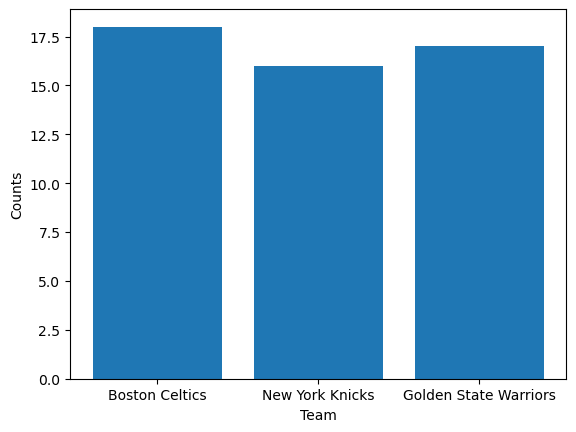

In [12]:
# Create a bar chart of how many players are on each team. Be sure to label your axes!
plt.bar(team_names, team_counts);
plt.ylabel("Counts");
plt.xlabel("Team");

## Quantitative data: statistics and plots

Quantitative data is numeric data (e.g., ints and floats).
- We can visualize quantitative data using histograms and boxplots. 
- The main statistics we use to sumarize the central tendency of quantitative data are the mean and the median.  

Let's explore this using the NBA salary data...


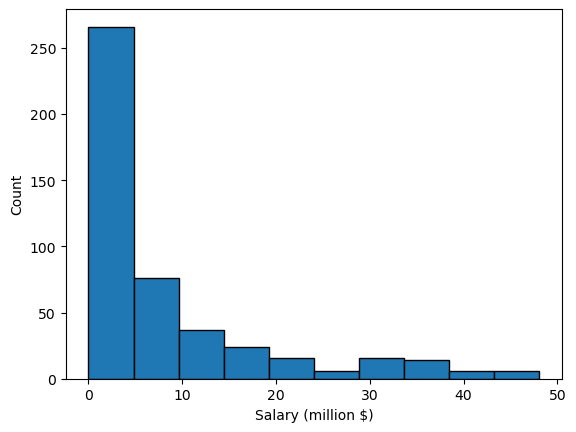

In [13]:
# plot a histogram of NBA salaries
plt.hist(salary_list, edgecolor = "k");
plt.ylabel("Count");
plt.xlabel("Salary (million $)");

In [14]:
# What is the average salary?
salary_tot = sum(salary_list)
salary_tot/len(salary_list)

8.416598747323338

In [15]:
# we can also use the statistics module to calculate statistics 
import statistics


In [16]:
# get the mean using the statistics package
statistics.mean(salary_list)


8.41659874732334

In [17]:
# get the median using the statistics package
statistics.median(salary_list)


3.72204

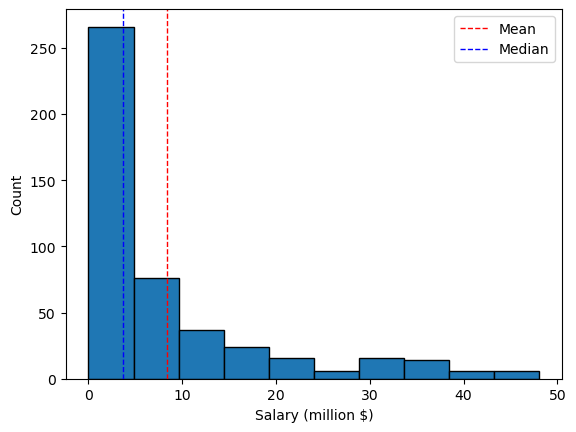

In [18]:
# plot the mean and the median on top of a histogram of salaries

plt.hist(salary_list, edgecolor = "k");
plt.ylabel("Count")
plt.xlabel("Salary (million $)");

plt.axvline(statistics.mean(salary_list), color='r', linestyle='dashed', linewidth=1, label = "Mean");
plt.axvline(statistics.median(salary_list), color='b', linestyle='dashed', linewidth=1, label = "Median");
plt.legend();


## Outliers 

An outlier is an observed value that is notably distinct from the other values in a dataset by being much smaller or larger than the rest of the data. Outliers can potentially have a large influence on the statistics you calculate!

One should examine outliers to understand what is causing them:
- If there are due to an error, remove them.
- Otherwise, need to think about how to treat them. 
  - Could be an interesting phenomenon. 
  - on
Could restrict data to a particurange of values.
  - etc. 





In [19]:
# Some fake data
my_data = [2, 3, 5, 7, 100000]


In [20]:
# Get the mean 
statistics.mean(my_data)


20003.4

In [21]:
# Get the median
statistics.median(my_data)


5

## Visualizing two quantitative variables

Let's create line plots and scatter plots to visualize daily bike trips using NYC CitiBike data....


In [22]:
# Download the CitiBike data
YData.download.download_data('daily_bike_totals.csv')

The file `daily_bike_totals.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [23]:
# Load the CitiBike data

import pandas as pd

bikes = pd.read_csv('daily_bike_totals.csv', parse_dates = [0])

bikes.head()


,date,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,dow,year,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,2013-07-01,16650,0.838583,0.0,0.0,77.00,71.96,3.13171,1,2013,7,False,NaN,True,True
1,2013-07-02,22745,0.078740,0.0,0.0,82.04,71.96,2.68432,2,2013,7,False,NaN,True,True
2,2013-07-03,21864,0.531496,0.0,0.0,82.94,73.04,4.25018,3,2013,7,False,NaN,True,True
3,2013-07-04,22326,0.000000,0.0,0.0,87.08,75.02,4.25018,4,2013,7,True,NaN,True,False
4,2013-07-05,21842,0.000000,0.0,0.0,89.96,75.92,4.92126,5,2013,7,False,NaN,True,True


In [24]:
# Extract the data to lists
dates = bikes['date'].to_list()
min_temp = bikes['min_temperature'].to_list()
max_temp = bikes['max_temperature'].to_list()

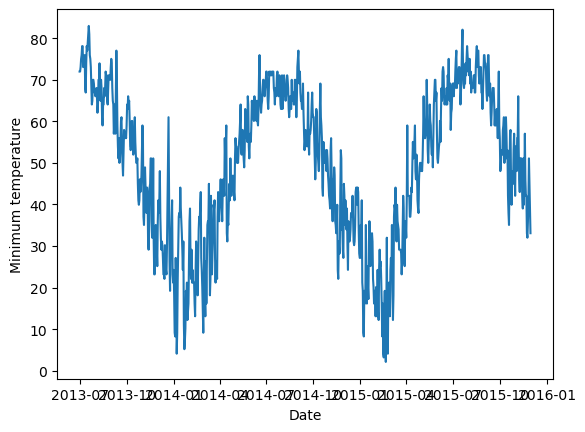

In [25]:
# Create a line plot of the number of trips as a function of the date

plt.plot(dates, min_temp);
plt.xlabel("Date");
plt.ylabel("Minimum temperature");


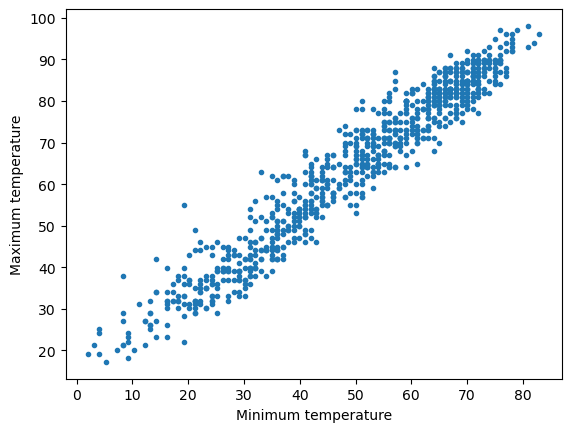

In [26]:
# Create a scatter plot of the maximum temperature as a funciton of the minimum temperature

plt.plot(min_temp, max_temp, '.');
plt.xlabel("Minimum temperature");
plt.ylabel("Maximum temperature");


<br>
<br>
<br>
<center>
<img src="https://pbs.twimg.com/media/DukTkwZWsAE7s0o?format=jpg&name=small" width="300"/>
</center>

## Creating Arrays

Often we want to process data that is all of the same type. For example, we might want to do processing on a data set of numbers (e.g., if we were just analyzing salary data). 

When we have data that is all of the same type, there are faster ways to process data than using a list. In Python, the `numpy` package offers ways to store and process data that is all of the same type using a data structure called a `ndarray`. There are also functions that operate on `ndarrays` that can do computations very efficiently. 

Let's explore this now!

In [27]:
# import the numpy package
import numpy as np

In [28]:
# create an ndarry of numbers
a_list = [2, 3, 4, 5]
an_array = np.array(a_list)

an_array

array([2, 3, 4, 5])

In [29]:
# we can get the type of elements in an array by accessing the dtype property
an_array.dtype

dtype('int64')

In [30]:
# get the size of the array
an_array.shape

(4,)

In [31]:
# create an array of strings
string_array = np.array(["a", "b", "c"])
string_array

array(['a', 'b', 'c'], dtype='<U1')

In [32]:
# get the type in the string array
string_array.dtype      # < little endian, U unicode, 1 bit

dtype('<U1')

In [33]:
# create a boolean array
boolean_array = np.array([True, True, False])
boolean_array

array([ True,  True, False])

In [34]:
# get the type in the boolean array
boolean_array.dtype

dtype('bool')

In [35]:
# what happens if we make an array from a list of mixed values
mixed_array = np.array([1, 2, "three"])
mixed_array

array(['1', '2', 'three'], dtype='<U21')

In [36]:
# get the dtype 
mixed_array.dtype

dtype('<U21')

In [37]:
mixed_array[0]

'1'

In [38]:
type(mixed_array[0])

numpy.str_

In [39]:
mixed_array[0] == 1

False

In [40]:
mixed_array[0] == '1'

True

In [ ]:
# create sequential numbers 1 to 9
sequential_nums = np.arrange(1, 10)      


## NumPy functions on numerical arrays

The NumPy package has a number of functions that operate very efficiently on numerical ndarrays.

Let's explore these functions by looking at the price of gas!

The data comes from: https://www.eia.gov/opendata/v1/qb.php?category=240692&sdid=PET.EMM_EPM0_PTE_NUS_DPG.W

In [41]:
# download the data
YData.download.download_data('US_Gasoline_Prices_Weekly.csv')

The file `US_Gasoline_Prices_Weekly.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [42]:
# read in and view the data
import pandas as pd
gas_data = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0])  # load in the data
gas_data.head()

,Week,DollarsPerGallon
0,2024-01-15,3.058
1,2024-01-08,3.073
2,2024-01-01,3.089
3,2023-12-25,3.116
4,2023-12-18,3.053


In [43]:
# Get an ndarray of the gas prices from each week of 2023
# You can ignore this code for now...

gas_data_2023 = gas_data[(gas_data['Week'] > '2023-01-01') & (gas_data['Week'] < '2024-01-01')] 

gas_prices_2023 = gas_data_2023["DollarsPerGallon"].values
gas_dates_2023 = gas_data_2023["Week"].values


In [44]:
# prices for all 52 weeks in 2022
gas_prices_2023.shape   

(52,)

In [45]:
# One dollar is currently 147 Yen. What has been the price of a gallon of gas cost in Yen? 
# What have gas prices been in Euros? 
gas_prices_2023 * 147

array([458.052, 448.791, 460.992, 474.957, 475.986, 483.483, 492.303,
       499.212, 510.531, 519.351, 525.672, 541.548, 558.306, 564.039,
       570.066, 561.834, 559.629, 560.511, 568.596, 565.95 , 562.716,
       552.279, 528.612, 523.173, 521.262, 518.469, 524.937, 525.819,
       528.465, 520.527, 524.937, 519.498, 519.792, 519.351, 529.2  ,
       537.432, 538.461, 528.612, 514.059, 502.887, 503.034, 508.032,
       498.183, 491.274, 496.713, 498.33 , 506.268, 512.883, 502.005,
       486.57 , 479.073, 473.781])

In [46]:
# what if there was a constant tax of $2 on each gallon purchased? 
gas_prices_2023 + 2

array([5.116, 5.053, 5.136, 5.231, 5.238, 5.289, 5.349, 5.396, 5.473,
       5.533, 5.576, 5.684, 5.798, 5.837, 5.878, 5.822, 5.807, 5.813,
       5.868, 5.85 , 5.828, 5.757, 5.596, 5.559, 5.546, 5.527, 5.571,
       5.577, 5.595, 5.541, 5.571, 5.534, 5.536, 5.533, 5.6  , 5.656,
       5.663, 5.596, 5.497, 5.421, 5.422, 5.456, 5.389, 5.342, 5.379,
       5.39 , 5.444, 5.489, 5.415, 5.31 , 5.259, 5.223])

In [47]:
# basic functions of: min, max, etc.
print([np.min(gas_prices_2023), np.max(gas_prices_2023)])

[3.053, 3.878]


In [48]:
# if you bought one gallon each week, what would you pay over the whole year? 
print(np.sum(gas_prices_2023))  

182.969


In [49]:
# what do you pay on average? 
print(np.mean(gas_prices_2023))
print(np.median(gas_prices_2023))

3.5186346153846153
3.5335


In [50]:
# If you bought one gallon each week, how much would you pay at the end of each of the weeks of the year? 
np.cumsum(gas_prices_2023)

array([  3.116,   6.169,   9.305,  12.536,  15.774,  19.063,  22.412,
        25.808,  29.281,  32.814,  36.39 ,  40.074,  43.872,  47.709,
        51.587,  55.409,  59.216,  63.029,  66.897,  70.747,  74.575,
        78.332,  81.928,  85.487,  89.033,  92.56 ,  96.131,  99.708,
       103.303, 106.844, 110.415, 113.949, 117.485, 121.018, 124.618,
       128.274, 131.937, 135.533, 139.03 , 142.451, 145.873, 149.329,
       152.718, 156.06 , 159.439, 162.829, 166.273, 169.762, 173.177,
       176.487, 179.746, 182.969])

In [51]:
# How much does the gas price go up and down each week? 
np.diff(gas_prices_2023)

array([-0.063,  0.083,  0.095,  0.007,  0.051,  0.06 ,  0.047,  0.077,
        0.06 ,  0.043,  0.108,  0.114,  0.039,  0.041, -0.056, -0.015,
        0.006,  0.055, -0.018, -0.022, -0.071, -0.161, -0.037, -0.013,
       -0.019,  0.044,  0.006,  0.018, -0.054,  0.03 , -0.037,  0.002,
       -0.003,  0.067,  0.056,  0.007, -0.067, -0.099, -0.076,  0.001,
        0.034, -0.067, -0.047,  0.037,  0.011,  0.054,  0.045, -0.074,
       -0.105, -0.051, -0.036])

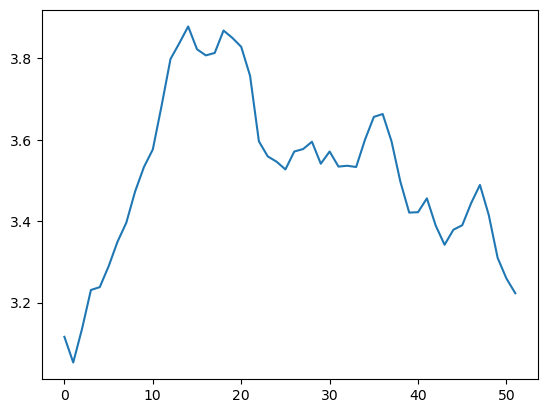

In [52]:
# plot the gas prices
plt.plot(gas_prices_2023);  

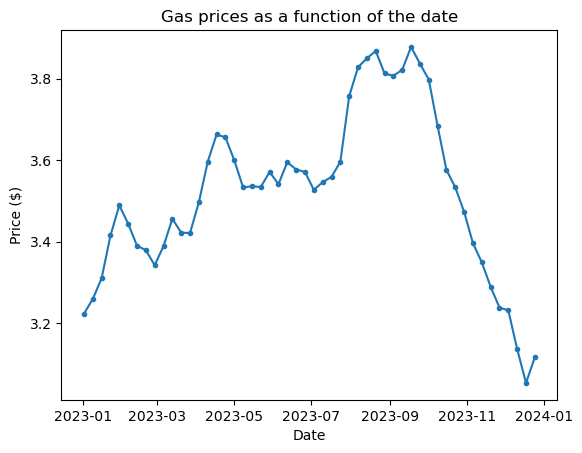

In [53]:
# plot the gas prices better!
plt.plot(gas_dates_2023, gas_prices_2023, '.-');  
plt.xlabel("Date");
plt.ylabel("Price ($)")
plt.title("Gas prices as a function of the date");

<br>
<br>
<br>
<p>
<center><img src=https://cdn.quotesgram.com/img/69/59/1803591020-high-gas-prices.jpg></center>

## Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [54]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5

array([False,  True, False,  True,  True,  True, False,  True])

In [55]:
# How many values are less than 5.
np.sum(my_array < 5)

5

In [56]:
# How many (and what proportion) of weeks in 2023 were gas prices were below $3.50?
np.sum(gas_prices_2023 < 3.50)

23

### What proportion of NBA players are centers? 

The data from the 2022-2023 season is loaded below and ndarrays for players positions and salaries are created. 

See if you can use this data to calculate the proportion of NBA players that are centers using numpy!

In [57]:
# Load the NBA data as a polars data frame
nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data
nba.head()

# Extract ndarrays for salary and position 
salary_array = nba["SALARY"].values
position_array = nba["POSITION"].values

print(salary_array[0:5])
print(position_array[0:5])


[ 9.835881  2.79264   3.53616   0.508891 23.5     ]
['SF' 'SF' 'SF' 'SG' 'PF']


In [58]:
# get the proportion of players that are centers
boolean_centers = position_array == "C"

print(np.sum(boolean_centers)/len(boolean_centers))

# equivalently we can use the np.mean() funciton 
np.mean(boolean_centers)

0.1948608137044968


0.1948608137044968

## Boolean indexing/masking

We can also use Boolean arrays to return values in another array. This is called "Boolean masking" or "Boolean indexing".


In [59]:
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5    

array([False,  True, False,  True,  True,  True, False,  True])

In [60]:
# Calculate the average salary of NBA centers

centers_salaries = salary_array[boolean_centers]
print(len(centers_salaries))

np.mean(centers_salaries)

91


7.282722109890111